#### Directories etc

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
from Bio import Entrez, SeqIO, AlignIO, pairwise2, Align, Seq, motifs
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation
from scipy.stats import binom
import math
import random
from tqdm import tqdm
from Comparative_Analysis import Utilities as util
from collections import defaultdict
import random
from joblib import Parallel, delayed
from Comparative_Analysis import Blast_Functions as blastfn
import time
import os
import copy
from Comparative_Analysis import ORF_Functions as orffn
from random import sample
pd.options.mode.chained_assignment = None  # default='warn'
import ete3;

C:\Users\nicho\Anaconda3\envs\Bioinformatics\lib\site-packages\ete3-3.1.2-py3.7.egg\ete3\evol\parser\codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\nicho\Anaconda3\envs\Bioinformatics\lib\site-packages\ete3-3.1.2-py3.7.egg\ete3\evol\parser\codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [2]:
project_dir = 'F:/Project_Data/Project_11'
seq_dir = 'F:/Datasets/Actinobacteria_Ref_Rep_Lev_Complete'
dictionary_dir = 'F:/Datasets/CRYPTIC_DATA/Cryptic_Dictionaries'
tb_species = 'NC_000962.3' 
tb_genome_filename = 'GCF_000195955.2_ASM19595v2_genomic.gbff'
mycobrowser_dir = 'F:/Datasets/Data_From_Publications'
num_cores = 16
core_numbers = list(range(1, num_cores+1))

In [3]:
def bin_formula(position_3_counts, tot_bin_counts):
    return 1- binom.cdf(position_3_counts-1, tot_bin_counts,1/3)
def mutation_bin_probability(mutation_counts):
    bin_counts = [0,0,0]
    for i, c in enumerate(mutation_counts):
        bin_counts[i % 3] += min(c,16000000)
    if sum(bin_counts) == 0:
        return (bin_counts, 2)
    else:
        return (bin_counts, bin_formula(bin_counts[2], sum(bin_counts)))  

In [4]:
for record in SeqIO.parse(seq_dir + '/' + tb_genome_filename, "genbank"):
    full_sequence = str(record.seq)

In [ ]:
with open(project_dir + '/variant_dict.pkl', 'rb') as f:
        variant_dict = pickle.load(f)  

In [ ]:
with open(project_dir + '/gpi_variant_df.pkl', 'rb') as f:
        variant_df = pickle.load(f) 

In [5]:
with open(project_dir + '/Mutation_Counts/zero_and_non_zero_mutation_counts.pkl', 'rb') as f:
    zero_and_non_zero_mutation_counts = pickle.load(f)     
with open(project_dir + '/Mutation_Counts/all_mutation_counts.pkl', 'rb') as f:
    all_mutation_counts = pickle.load(f)     

In [8]:
with open(project_dir + '/Thoth_Full_Run/zero_and_non_zero_mutation_counts.pkl', 'rb') as f:
    full_sample_zero_and_non_zero_mutation_counts = pickle.load(f)   

In [ ]:
with open(project_dir + '/position_dict.pkl', 'rb') as f:
        position_dict = pickle.load(f)  
with open(project_dir + '/id_pos_dict.pkl', 'rb') as f:
        id_pos_dict = pickle.load(f)  
with open(project_dir + '/pos_id_dict.pkl', 'rb') as f:
        pos_id_dict = pickle.load(f)  
with open(project_dir + '/id_dict.pkl', 'rb') as f:
        id_dict = pickle.load(f)  

In [ ]:
id_reverse_dict = {}
for k, v in id_dict.items():
    id_reverse_dict[v] = k

In [ ]:
len(variant_dict)

In [ ]:
genomes_df = pd.read_csv('F:/Project_Data/Project_11/Datasets/GENOMES.csv')
lineage_dict = {}
for i,r in genomes_df.iterrows():
    lineage_dict[r['UNIQUEID']] = r['MYKROBE_LINEAGE_NAME_2'] 

In [ ]:
with open(project_dir + '/Dictionaries/variant_dictionary_364848_365376_.pkl', 'rb') as f:
        var_dict = pickle.load(f)  
with open(project_dir + '/Mutation_Counts/mutation_counts_364848_365376_.pkl', 'rb') as f:
        mutation_counts = pickle.load(f)  
temp_dict = {}
for k, v in var_dict.items():
    if not(v[pos_id_dict[3186859] - 364848] =={'T'}):
        temp_dict[k] =list(v[pos_id_dict[3186859] - 364848])[0]

In [ ]:
with open(project_dir + '/Dictionaries/variant_dictionary_331584_332112_.pkl', 'rb') as f:
        var_dict = pickle.load(f)  
with open(project_dir + '/Mutation_Counts/mutation_counts_331584_332112_.pkl', 'rb') as f:
        mutation_counts = pickle.load(f)  
temp_dict = {}
for k, v in var_dict.items():
    if not(v[pos_id_dict[2878549] - 331584] =={'G'}):
        temp_dict[k] =list(v[pos_id_dict[2878549] - 331584])[0]

In [ ]:
tb_tree_filename = 'tb_gpi.nwk'
master_tree2= ete3.Tree(project_dir + '/' + tb_tree_filename)
for node in master_tree2.traverse("postorder"):
    if node.is_leaf():
        if node.name in temp_dict:
            node.name = str(lineage_dict[id_reverse_dict[int(node.name.split('_')[1])]]) + '_'+temp_dict[(node.name)]
            nstyle = ete3.NodeStyle()
            nstyle["fgcolor"] = "red"
            nstyle["size"] = 1
            node.set_style(nstyle)
        else:
            node.name = str(lineage_dict[id_reverse_dict[int(node.name.split('_')[1])]])

In [ ]:
ts = ete3.TreeStyle()
ts.show_leaf_name = False
#ts.branch_vertical_margin = 2
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
#ts.show_branch_length = True
#ts.show_branch_support = True

In [ ]:
master_tree2.render(project_dir+'/mytree.pdf', tree_style=ts);

In [ ]:
tb_tree_filename = 'tb_gpi.nwk'
master_tree2= ete3.Tree(project_dir + '/' + tb_tree_filename)
temp = []
for node in master_tree2.traverse("postorder"):
    if node.is_leaf():
        temp.append([node.name, lineage_dict[id_reverse_dict[int(node.name.split('_')[1])]]])

In [ ]:
temp_df = pd.DataFrame(temp, columns = [['label', 'lineage']])

In [ ]:
temp_df.to_csv(project_dir + '/lineages.csv')

In [ ]:
for (k, v) in position_dict[342146][1:]:
    if v == 't':
        print(k, v)

In [ ]:
for k, v in position_dict.items():
    #if len(v) > 5000 and len(v) < 10000:
    if 1==1:
        if  zero_and_non_zero_mutation_counts[k-1] > 1000  and zero_and_non_zero_mutation_counts[k-1]/(len(v)-1) > 0.1:
            print(k-1, pos_id_dict[k-1], len(v)-1,  zero_and_non_zero_mutation_counts[k-1], zero_and_non_zero_mutation_counts[k-1]/(len(v)-1), full_sequence[k-1], v[0], set([x[1] for x in v[1:]]) )

In [ ]:
for n, x in enumerate(zero_and_non_zero_mutation_counts):
    if x > 0 and len(variant_df[variant_df['GENOME_INDEX'] == n+1]) ==  0:
        print(n, pos_id_dict[n], x, len(variant_df[variant_df['GENOME_INDEX'] == n+1]), n, x/len(variant_df[variant_df['GENOME_INDEX'] == n+1]))
        

In [ ]:
variant_df[variant_df['GENOME_INDEX'] == 3186860]

In [9]:
cds_boundaries = []
for genome_record in SeqIO.parse(seq_dir + '/' + tb_genome_filename, "genbank"):
    for feature in genome_record.features:
        if feature.type == 'CDS':
            a = feature.qualifiers  
            if a.get("pseudo") == None:
                pseudo = False
            else:
                pseudo = True
            cds_boundaries.append((a.get("locus_tag")[0], pseudo, a.get("product")[0], int(feature.location.start), int(feature.location.end), int(feature.location.strand)))   

In [12]:
temp =[]
for (locus, pseudo, product, start, stop, strand) in cds_boundaries:
    if pseudo == False:
        if strand == 1:
            temp.append(mutation_bin_probability(full_sample_zero_and_non_zero_mutation_counts[start:stop]))
        else:
            temp.append(mutation_bin_probability(reversed(full_sample_zero_and_non_zero_mutation_counts[start:stop])))
scores = []
for x in temp:
    scores.append(x[1])

In [14]:
len(scores)

3906

<AxesSubplot:ylabel='Count'>

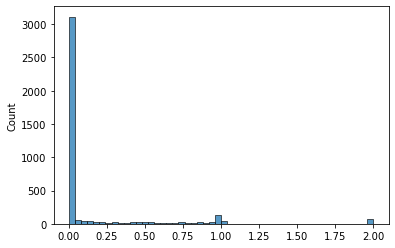

In [13]:
sns.histplot(scores, bins = 50)

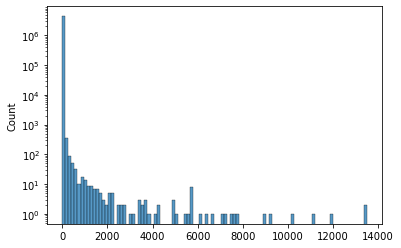

In [17]:
sns.histplot([x for x in full_sample_zero_and_non_zero_mutation_counts], bins = 100)
plt.yscale('log')

In [ ]:
compass_df = pd.read_csv('F:/Datasets/CRYPTIC_DATA/COMPASS.csv', names = ['species', 'start', 'stop','count'])

In [ ]:
compass_dict = {}
for i, r in compass_df.iterrows():
    for k in range(r['start'], r['stop']):     #  Should te start-1 but seems to ve inconsistency with mutations!!
        compass_dict[k] = 'Y'

In [ ]:
temp = []
for n, c in enumerate(zero_and_non_zero_mutation_counts):
    if n in compass_dict:
        temp.append([n, c, 'Y'])
    else:
        temp.append([n, c, 'N'])

In [ ]:
[x for x in temp if (x[2] == 'Y' and x[1]>0)]

In [ ]:
unmasked_counts = [x for x in temp if (x[2] == 'N')]

In [ ]:
temp = []
for i in range(int(len(unmasked_counts)/2000)+1):
    start = i*2000
    stop = min(len(unmasked_counts), (i+1)*2000)
    temp.append((unmasked_counts[start][0],unmasked_counts[stop-1][0], sum([x[1] for x in unmasked_counts[start:stop]])))

In [ ]:
sns.histplot([x[2] for x in temp if x[2]<1000])

In [ ]:
a =len([x for x in unmasked_counts if x[1] == 0])/len(unmasked_counts)

In [ ]:
pow(a,70)*len(full_sequence)/70

In [ ]:
ultra_conserved_candidates = []
lengths = []
mutation_len = len(unmasked_counts)
i = 0
start = unmasked_counts[0][0]
while i < mutation_len - 1:
    if unmasked_counts[i][1] == 0 and (i == 0 or unmasked_counts[i][0] == unmasked_counts[i-1][0]+1):
        i+=1
    else:
        stop = unmasked_counts[i-1][0]
        zero_length = stop - start - 1
        if zero_length < 120:
            pass
        else:
            lengths.append(zero_length)
            ultra_conserved_candidates.append([start, stop])
        i+=1 
        start = unmasked_counts[i][0]

In [ ]:
ultra_conserved_candidates

In [ ]:
for i, x in enumerate(zero_and_non_zero_mutation_counts):
    if x > 2000:
        print(x)
        for (locus, pseudo, product, start, stop, strand) in cds_boundaries:
            if i >= start and i < stop:
                print(i, start, stop, locus, product, x)
                break

In [ ]:
full_sequence[5077:5082]

In [ ]:
distinct_ids = []
variants = []
for k, v in tqdm(variant_dict.items()):
    if set(v) in variants:
        continue
    else:
        variants.append(set(v))
        distinct_ids.append(k)

In [ ]:
len(variant_dict)

In [ ]:
len(distinct_ids)

In [ ]:
pow(2,10)

In [ ]:
len(position_dict)

In [ ]:
len(var_df['UNIQUEID'].unique())

In [ ]:
filter_fails = list(var_df[var_df['FRS'] <0.9]['GENOME_INDEX'].unique())

In [ ]:
a = pd.read_csv("F:Datasets/CRYPTIC_DATA/COMPASS.csv", names = ['Species', 'Start', 'Stop', 'Count'])

In [ ]:
temp = []
for i,r in a.iterrows():
    temp.append((r['Start'], r['Stop']))

In [ ]:
len(filter_fails)

In [ ]:
len(list(var_df[var_df['IS_NULL']!=True]['GENOME_INDEX'].unique()))

In [ ]:
temp = []
for i in range(0, int(len(zero_and_non_zero_mutation_counts)/1000)):
    temp.append([i*1000, sum(zero_and_non_zero_mutation_counts[i*1000:(i+1)*1000])])
temp_df = pd.DataFrame(temp, columns = ['Pos','Value_Count'])

In [ ]:
sns.lineplot(data = temp_df, x = 'Pos', y ='Value_Count')